<a href="https://colab.research.google.com/github/dhcryan/kaggle_challenge_/blob/minsik/week3/minsik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
holev = pd.read_csv('/content/holidays_events.csv')
oil = pd.read_csv('/content/oil.csv')
samsub = pd.read_csv('/content/sample_submission.csv')
store = pd.read_csv('/content/stores.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
trans = pd.read_csv('/content/transactions.csv')

In [4]:
holev.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
samsub.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [7]:
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [10]:
trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
trans["date"] = pd.to_datetime(trans.date)

In [12]:
train.onpromotion = train.onpromotion.astype("float32")
train.sales = train.sales.astype("float32")

In [13]:
trans_re = trans.set_index("date").resample("D").transactions.mean().reset_index()
trans_re["year"] = trans_re.date.dt.year
px.line(trans_re, x='date', y='transactions')

In [14]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
267805,267805,2013-05-31,23.0,EGGS,46.0,0.0
267806,267806,2013-05-31,23.0,FROZEN FOODS,33.0,0.0
267807,267807,2013-05-31,23.0,GROCERY I,1737.0,0.0
267808,267808,2013-05-31,23.0,GROCERY II,17.0,0.0
267809,267,NaT,NaN,NaN,NaN,NaN


In [19]:
train['store_nbr'].value_counts()

1.0     4983
17.0    4983
10.0    4983
22.0    4983
21.0    4983
2.0     4983
19.0    4983
18.0    4983
20.0    4983
16.0    4983
15.0    4983
14.0    4983
13.0    4983
12.0    4983
11.0    4983
23.0    4964
5.0     4950
43.0    4950
44.0    4950
45.0    4950
46.0    4950
47.0    4950
48.0    4950
49.0    4950
7.0     4950
50.0    4950
51.0    4950
52.0    4950
53.0    4950
54.0    4950
6.0     4950
41.0    4950
8.0     4950
42.0    4950
34.0    4950
40.0    4950
30.0    4950
24.0    4950
25.0    4950
26.0    4950
27.0    4950
28.0    4950
29.0    4950
3.0     4950
31.0    4950
4.0     4950
32.0    4950
33.0    4950
35.0    4950
36.0    4950
37.0    4950
38.0    4950
39.0    4950
9.0     4950
Name: store_nbr, dtype: int64

In [22]:
store['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

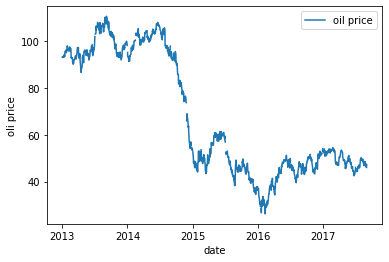

In [65]:
transnb1 = trans[trans['store_nbr'] == 1]
plt.plot(oil['date'],oil['dcoilwtico'],linestyle = 'solid',label = 'oil price')
plt.xlabel('date')
plt.ylabel('oli price')
plt.legend()
plt.show()

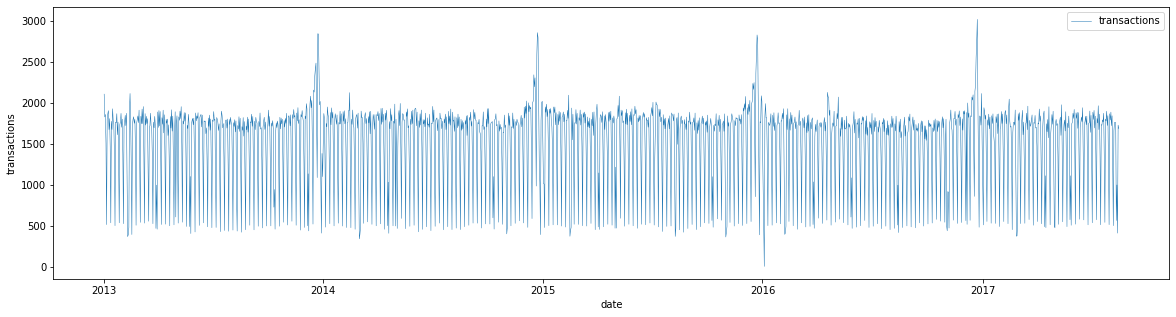

In [66]:
plt.figure(figsize = (20,5))
plt.plot(transnb1['date'],transnb1['transactions'],linewidth = 0.5,label = 'transactions')
plt.xlabel('date')
plt.ylabel('transactions')
plt.legend()
plt.show()

In [ ]:
oil['date'] = pd.to_datetime(oil.date)

In [81]:
nb_list = train['store_nbr'].unique()
nb_list = np.delete(nb_list,-1)
nb_list.size

54

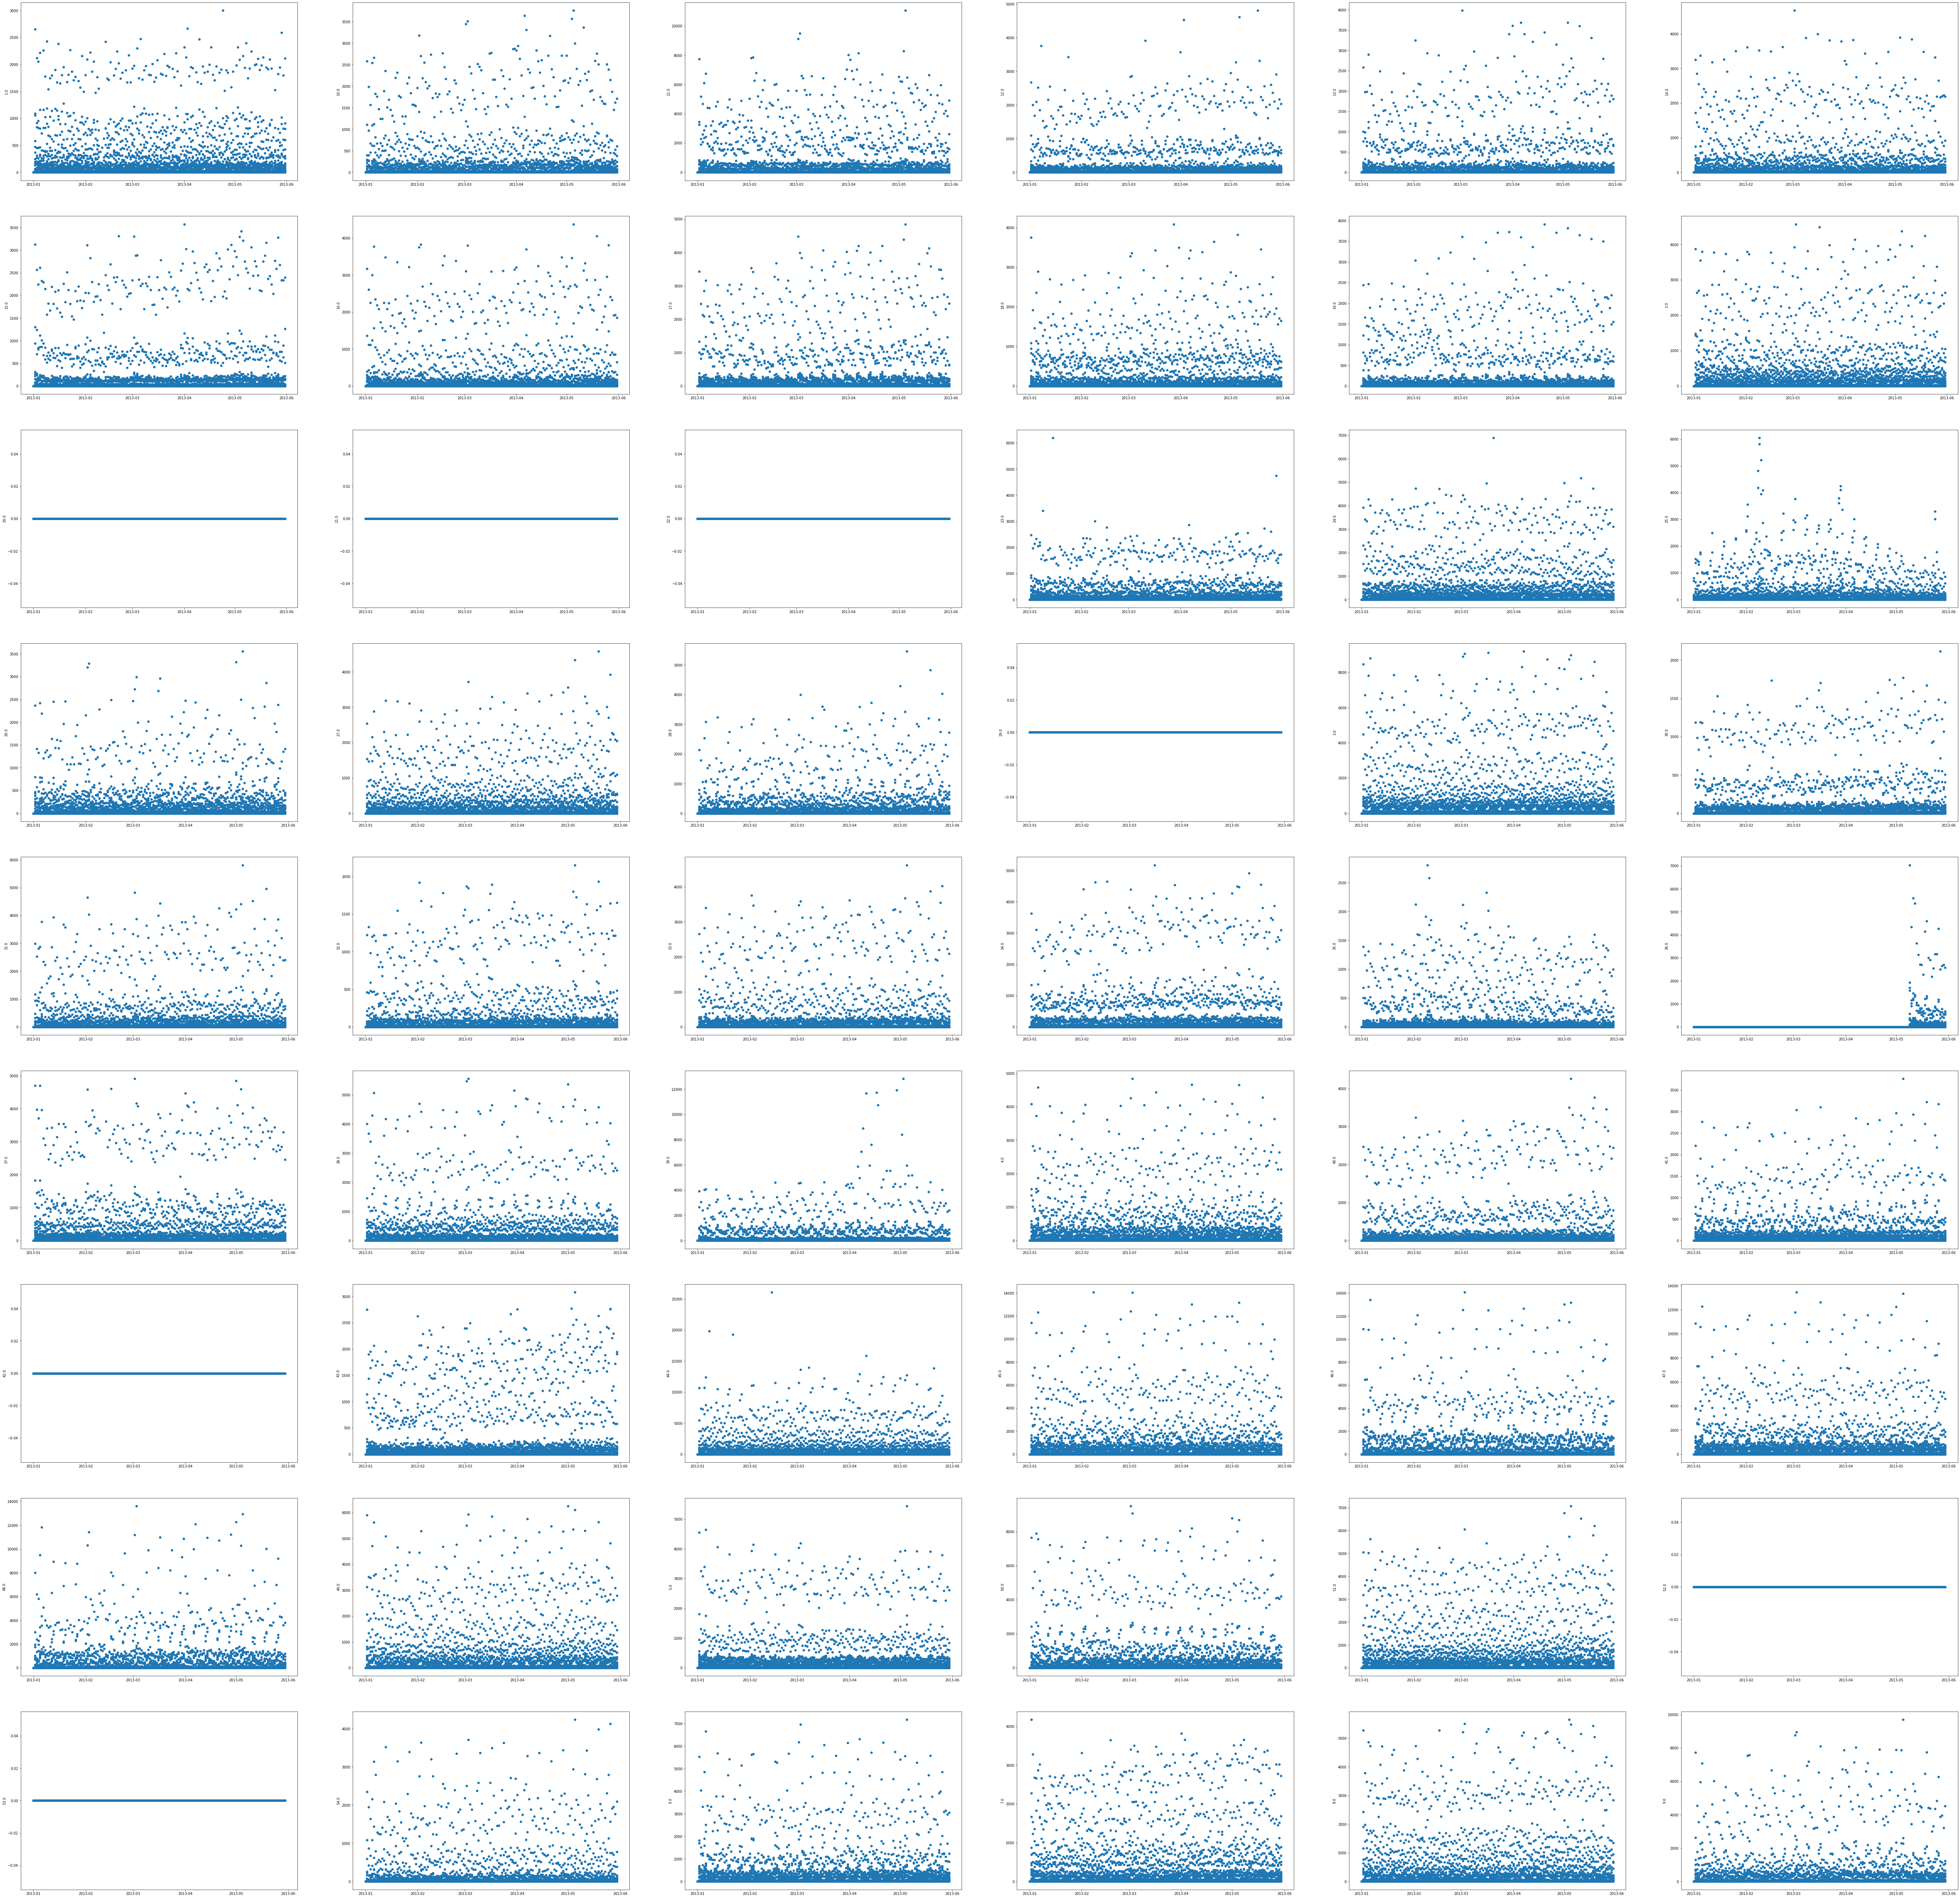

In [90]:
f,a = plt.subplots(9,6,figsize = [100,100])
j = 0
k = 0
for i in nb_list:
  train_nb = train[train['store_nbr']== i]
  a[j][k].scatter(train_nb['date'],train_nb['sales'])
  a[j][k].set_ylabel(i)
  plt.ylabel(i)
  if k == 5:
    j+=1
    k=0
  else:
    k +=1
  #plt.plot(train_nb['date'],train_nb['sales'],linestyle = 'none',marker = 'o',label = 'sale')
  #plt.ylabel(i)
plt.show()